In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Introduce a feature with a different scale
X = np.c_[X, X**2]  # Adding a quadratic feature

In [5]:
# Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

In [7]:
def gradient_descent(X, y, alpha, n_iterations):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Random initialization
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

    return theta, cost_history

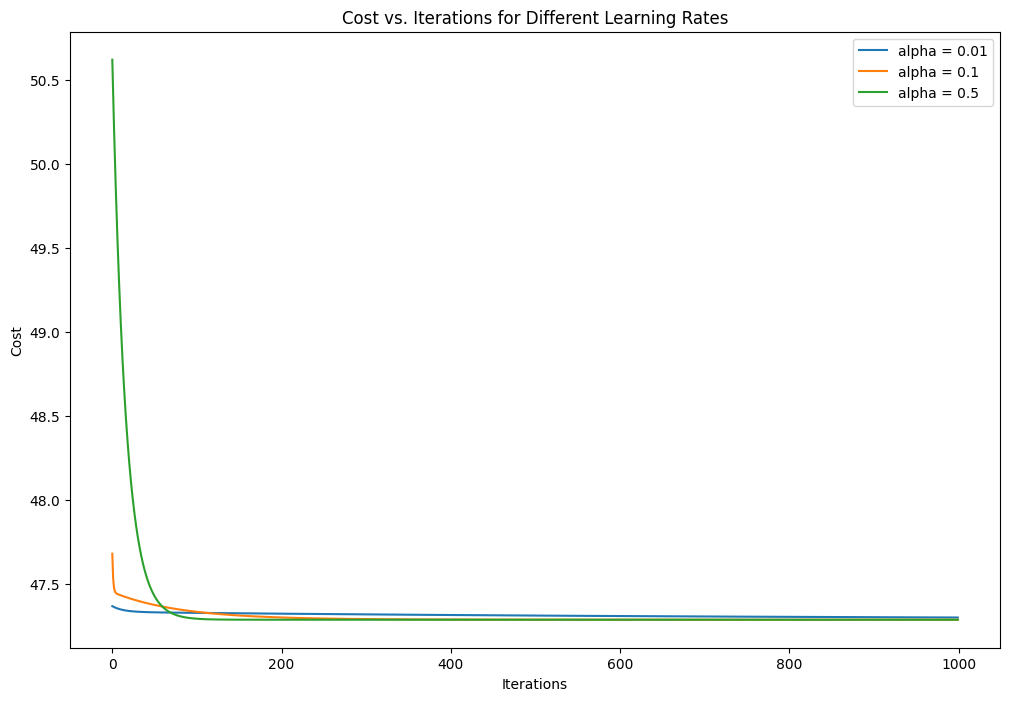

In [9]:
# Training with different learning rates
alphas = [0.01, 0.1, 0.5]
n_iterations = 1000

plt.figure(figsize=(12, 8))

for alpha in alphas:
    theta, cost_history = gradient_descent(X_scaled, y, alpha, n_iterations)
    plt.plot(range(n_iterations), cost_history, label=f"alpha = {alpha}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()